## Multi-distance CTF Phase Retrieval

This notebook runs an example of multi-distance CTF phase retrieval on simulation data in `edf` format.

> ***NOTE: If using unrealeased version of pyPhase, have the source files in the python projects directory and
change `pyphase inmport` to `import`.***

Creating a *Conda* enviornment for this notebook.
```bash
conda create --name pyPhaseEnv --channel conda-forge python=3.7 numpy yaml sortedcontainers
source activate pyPhaseEnv
```

Make sure pyPhase source code is in the systems path so that the modules can be imported.

In [1]:
import os
import sys

pyphase_path_1 = os.path.abspath('/home/diofig/tomograms/users/diogo/Python/latest/pyPhase/')
pyphase_path_2 = os.path.abspath('/home/diofig/tomograms/users/diogo/Python/latest/')
sys.path.append(pyphase_path_1)
sys.path.append(pyphase_path_2)

In [2]:
from pyPhase import dataset
from pyPhase import phaseretrieval

from EdfFile import EdfFile # for visualization
import matplotlib.pyplot as plt 

### Loading the data



Define the data `path` and the projects `name` and instantiate a DataSet object.

*Note that the project name must match the prefix of the directories and files names.*

Define the projects name

In [3]:
name = 'holosim'

and set the path to the data

In [4]:
path = '/data/staff/tomograms/users/diogo/Data/HoloSim/'

Make sure that the data folders and files have the right format and structure.

You can have a look at the data 

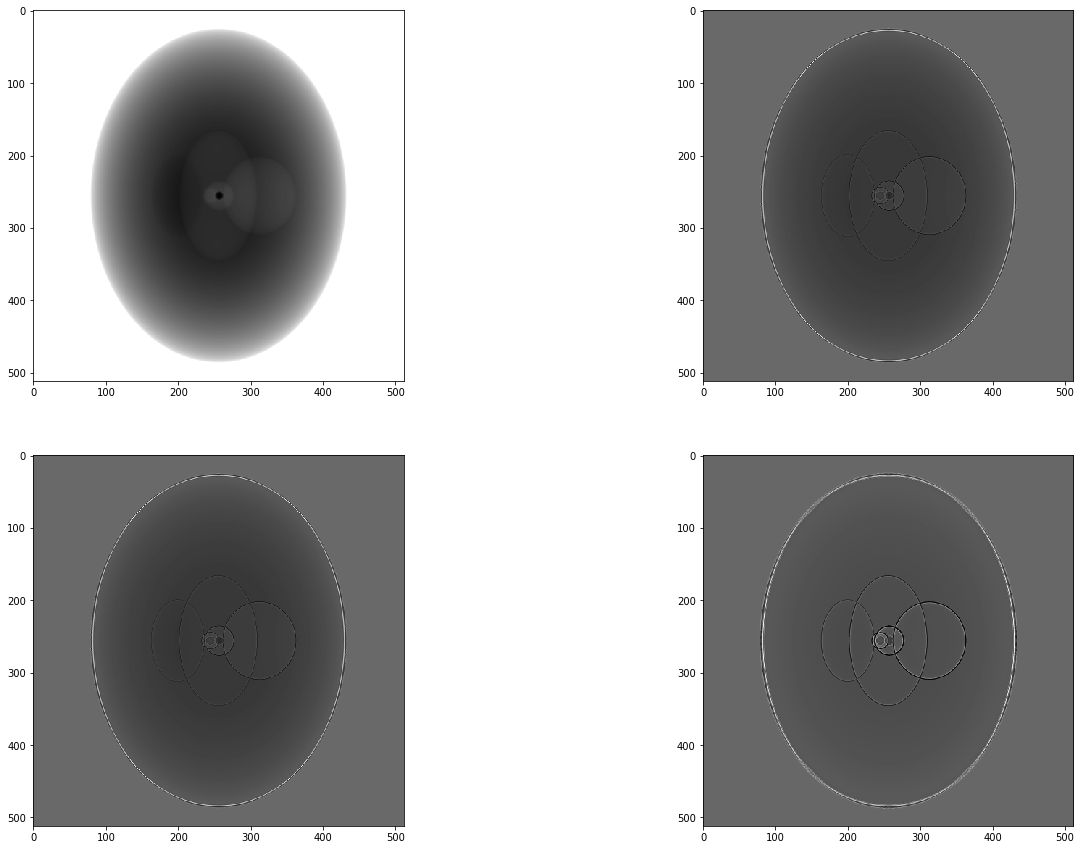

In [5]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (22, 15))

for i,row in enumerate(ax):
    for j,col in enumerate(row):
        file = '/data/staff/tomograms/users/diogo/Data/HoloSim/holosim_{proj}_/holosim_{proj2}_0001.edf'.format(proj=(i+1)*(j+1),proj2=(i+1)*(j+1))
        im = EdfFile(file).GetData(0)
        col.imshow(im, cmap='gray')

Create a DataSet object

In [6]:
ds = dataset.ESRFID19(path,name)

/home/diofig/tomograms/users/diogo/Python/latest/pyPhase/dataset.py:253: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  parameters=yaml.load(f)


In [7]:
ds.preprocess = 0
ds.correct_shifts = 0
ds.correct_motion = 0

### Phase retrieval

Choose a phase retreival algorithm(link to list of algorithms) and create a retreiver for the dataset, with the appropriate arguments 

In [8]:
alpha =  1e-8
retriever = phaseretrieval.CTF(ds,alpha)

Select range of projections for which to retrieve phase

In [9]:
start = 0 
end = 3

Run the phase retreival

In [10]:
retriever.ReconstructProjections(ds, start, end)

projection 0
projection 1
projection 2
projection 3


For each projection, a file named `holosim_PP_000[n].edf` with the retrieved phase and a file named `holosim_att_PP`, with the retrieved attenuation, is created in the `[path]/myProject_`.


### Visualizing the results

Look at the results by plotting the retrieved phase and retrieved attenuation for one projection.

Phase:

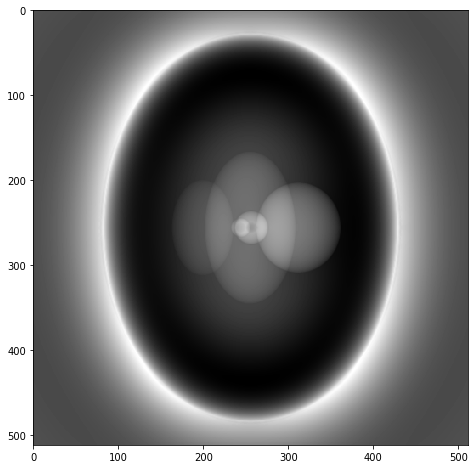

In [21]:
plt.figure(figsize = [8,8])
im = EdfFile(path + 'holosim_/holosim_PP_0001.edf').GetData(0)
plt.imshow(im, cmap = 'gray')
plt.show()

Attenuation:

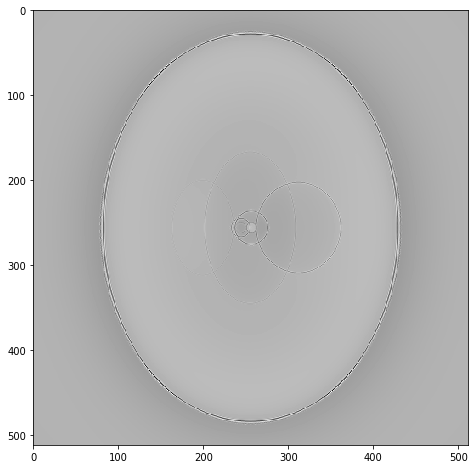

In [20]:
plt.figure(figsize = [8,8])
im = EdfFile(path + 'holosim_/holosim_PP_att_0001.edf').GetData(0)
plt.imshow(im, cmap = 'gray')
plt.show()